# Curse of Dimensionality

Definition

The curse of dimensionality refers to a collection of problems that arise when analyzing or modeling data with a large number of features (dimensions). As dimensionality increases, the volume of the feature space grows exponentially, making data sparse, distance measures less meaningful, and learning algorithms less effective.

This concept was formally articulated by Richard Bellman in the context of dynamic programming, but it is now fundamental in data science and machine learning.

# Dimensionality Reduction 
### Dimensionality Reduction Techniques

# 1. PCA – Principal Component Analysis

PCA (Principal Component Analysis) एउटा unsupervised dimensionality reduction technique हो, जसले धेरै feature भएको डेटालाई कम आयाममा रूपान्तरण गर्छ तर अधिकतम जानकारी (variance) जोगाएर राख्छ।

सरल भाषामा, PCA ले डेटा सबैभन्दा बढी फैलिएको दिशा खोज्छ र त्यसै दिशामा नयाँ feature बनाउँछ।

# E.G. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, M = 2.0, B = 5.0, X_MIN = 0.0, X_MAX = 30.0):
      
      n_samples = n
      random = np.random.RandomState(1)  # RandomState Seeding

      # create random x values
      x1 = random.uniform(low=X_MIN, high=X_MAX, size=n_samples).reshape(n_samples, 1) 

      # calculate x2 values along the line
      x2 = M * x1 + B

      # add random noise
      x2 += random.normal(loc=0.0, scale=5.0, size=x2.shape).reshape(n_samples, 1)
      X = np.concatenate([np.round(x1,2), np.round(x2,2)], axis=1)
      return X 

X = generate_data(25)

# Normalize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

X.shape

(25, 2)

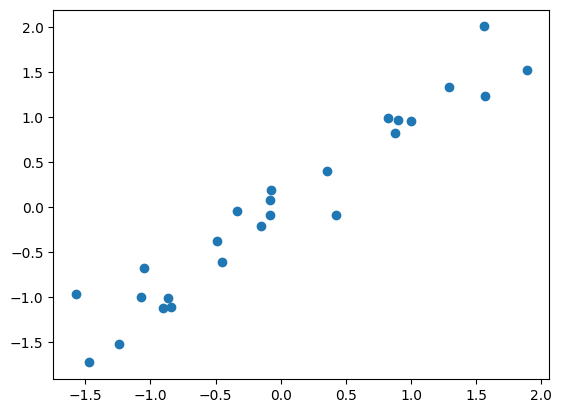

In [9]:
plt.scatter(X[:,0], X[:,1])

In [10]:
cov = np.dot(X.T, X)

cov

array([[25.        , 24.12294297],
       [24.12294297, 25.        ]])

In [11]:
e_values, e_vectors = np.linalg.eig(cov)

In [16]:
e_values

array([ 0.87705703, 49.12294297])

In [15]:
e_vectors

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [13]:
lambda1, lambda2 = e_values

In [14]:
v1, v2 = e_vectors[]

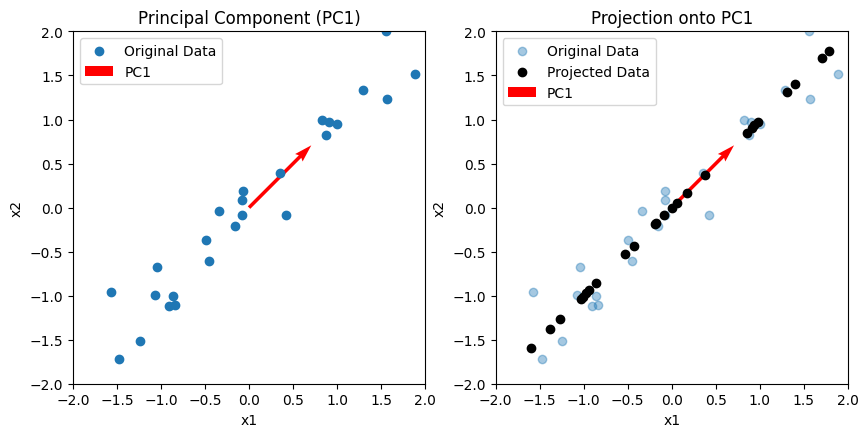

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data generation
# -----------------------------
def generate_data(n, M=2.0, B=5.0, X_MIN=0.0, X_MAX=30.0):
    random = np.random.RandomState(1)
    x1 = random.uniform(X_MIN, X_MAX, n).reshape(-1, 1)
    x2 = M * x1 + B
    x2 += random.normal(0, 5.0, x2.shape)
    return np.hstack([x1, x2])

X = generate_data(25)

# -----------------------------
# Standardization
# -----------------------------
X = (X - X.mean(axis=0)) / X.std(axis=0)

# -----------------------------
# PCA computation
# -----------------------------
# Covariance matrix
C = np.cov(X.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(C)

# Sort eigenvectors by eigenvalues (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# First principal component (PC1)
v1 = eigenvectors[:, 0]

# -----------------------------
# Projection onto PC1
# -----------------------------
X_projected = X @ v1.reshape(-1, 1)       # (n,1)
X_inverse = X_projected @ v1.reshape(1, -1)  # back to 2D

# -----------------------------
# Plotting
# -----------------------------
x, y = 0, 0
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# ---- Plot 1: Original data + PC1 direction
axs[0].scatter(X[:, 0], X[:, 1], label="Original Data", zorder=2)
axs[0].quiver(
    x, y, v1[0], v1[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[0].set_title("Principal Component (PC1)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_aspect('equal')
axs[0].legend()

# ---- Plot 2: Projection onto PC1
axs[1].scatter(X[:, 0], X[:, 1], label="Original Data", alpha=0.4)
axs[1].scatter(X_inverse[:, 0], X_inverse[:, 1],
               color='black', label="Projected Data", zorder=10)
axs[1].quiver(
    x, y, v1[0], v1[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[1].set_title("Projection onto PC1")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[1].set_aspect('equal')
axs[1].legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data generation
# -----------------------------
def generate_data(n, M=2.0, B=5.0, X_MIN=0.0, X_MAX=30.0):
    random = np.random.RandomState(1)
    x1 = random.uniform(X_MIN, X_MAX, n).reshape(-1, 1)
    x2 = M * x1 + B
    x2 += random.normal(0, 5.0, x2.shape)
    return np.hstack([x1, x2])

X = generate_data(25)

# -----------------------------
# Standardization
# -----------------------------
X = (X - X.mean(axis=0)) / X.std(axis=0)

# -----------------------------
# PCA computation
# -----------------------------
# Covariance matrix
C = np.cov(X.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(C)

# Sort eigenvectors by eigenvalues (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# First principal component (PC1)
v1 = eigenvectors[:, 0]

# -----------------------------
# Projection onto PC1
# -----------------------------
X_projected = X @ v1.reshape(-1, 1)       # (n,1)
X_inverse = X_projected @ v1.reshape(1, -1)  # back to 2D

# -----------------------------
# Plotting
# -----------------------------
x, y = 0, 0
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# ---- Plot 1: Original data + PC1 direction
axs[0].scatter(X[:, 0], X[:, 1], label="Original Data", zorder=2)
axs[0].quiver(
    x, y, v1[0], v1[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[0].set_title("Principal Component (PC1)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_aspect('equal')
axs[0].legend()

# ---- Plot 2: Projection onto PC1
axs[1].scatter(X[:, 0], X[:, 1], label="Original Data", alpha=0.4)
axs[1].scatter(X_inverse[:, 0], X_inverse[:, 1],
               color='black', label="Projected Data", zorder=10)
axs[1].quiver(
    x, y, v1[0], v1[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', width=0.01, label="PC1"
)
axs[1].set_title("Projection onto PC1")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].set_xlim(-2, 2)
axs[1].set_ylim(-2, 2)
axs[1].set_aspect('equal')
axs[1].legend()

plt.show()
